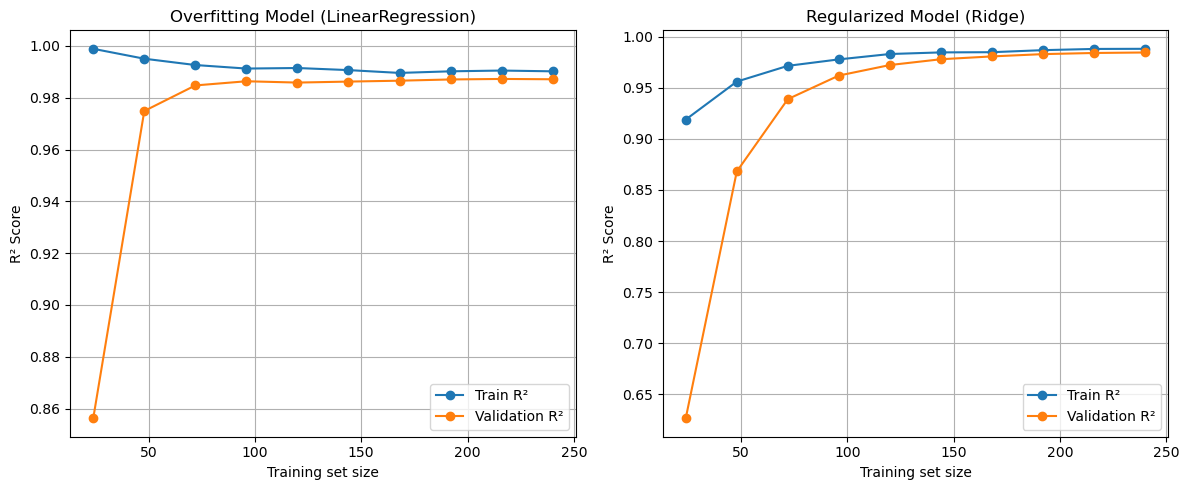

(202.61051354545233,
 220.39010041766207,
 np.float64(-248.36743211423627),
 np.float64(33.03549637288596),
 253.34110723089103,
 331.36952689252394,
 np.float64(-351.78808361958147),
 np.float64(64.97220465649242))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

# Generate synthetic regression dataset
X, y = make_regression(n_samples=300, n_features=20, noise=15, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Overfitting model: Linear regression without regularization (too many features relative to samples)
model_overfit = LinearRegression()

# Regularized model: Ridge regression (reduces variance)
model_regularized = Ridge(alpha=10)

# --- Check training vs validation errors using cross_val_score ---
from sklearn.metrics import make_scorer, mean_squared_error

scorer = make_scorer(mean_squared_error, greater_is_better=False)

cv_scores_overfit = cross_val_score(model_overfit, X_train, y_train, cv=5, scoring=scorer)
cv_scores_ridge   = cross_val_score(model_regularized, X_train, y_train, cv=5, scoring=scorer)

train_mse_overfit = mean_squared_error(y_train, model_overfit.fit(X_train, y_train).predict(X_train))
test_mse_overfit  = mean_squared_error(y_test, model_overfit.predict(X_test))

train_mse_ridge = mean_squared_error(y_train, model_regularized.fit(X_train, y_train).predict(X_train))
test_mse_ridge  = mean_squared_error(y_test, model_regularized.predict(X_test))

# --- Learning Curves ---
train_sizes, train_scores_overfit, val_scores_overfit = learning_curve(
    model_overfit, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_sizes, train_scores_ridge, val_scores_ridge = learning_curve(
    model_regularized, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Average across folds
train_mean_overfit = np.mean(train_scores_overfit, axis=1)
val_mean_overfit   = np.mean(val_scores_overfit, axis=1)

train_mean_ridge = np.mean(train_scores_ridge, axis=1)
val_mean_ridge   = np.mean(val_scores_ridge, axis=1)

# --- Plot Learning Curves ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_sizes, train_mean_overfit, 'o-', label="Train R²")
plt.plot(train_sizes, val_mean_overfit, 'o-', label="Validation R²")
plt.title("Overfitting Model (LinearRegression)")
plt.xlabel("Training set size")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_sizes, train_mean_ridge, 'o-', label="Train R²")
plt.plot(train_sizes, val_mean_ridge, 'o-', label="Validation R²")
plt.title("Regularized Model (Ridge)")
plt.xlabel("Training set size")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Display numeric comparison
(train_mse_overfit, test_mse_overfit, cv_scores_overfit.mean(), cv_scores_overfit.std(),
 train_mse_ridge, test_mse_ridge, cv_scores_ridge.mean(), cv_scores_ridge.std())
